In [5]:
# DATA LOADING

from utils.data_loader.mobility_data_loader import mobility_data_loader 

# Process whole dataset in to intermediate form
dataframe = mobility_data_loader('20240101','20240131')

1
20240101 dataframe shape
(85653, 18)
2
20240102 dataframe shape
(84857, 18)
3
20240103 dataframe shape
(85335, 18)
4
20240104 dataframe shape
(101273, 18)
5
20240105 dataframe shape
(113529, 18)
6
20240106 dataframe shape
(104928, 18)
7
20240107 dataframe shape
(94203, 18)
8
20240108 dataframe shape
(91534, 18)
9
20240109 dataframe shape
(115631, 18)
10
20240110 dataframe shape
(115583, 18)
11
20240111 dataframe shape
(117350, 18)
12
20240112 dataframe shape
(119567, 18)
13
20240113 dataframe shape
(106789, 18)
14
20240114 dataframe shape
(99355, 18)
15
20240115 dataframe shape
(114665, 18)
16
20240116 dataframe shape
(115293, 18)
17
20240117 dataframe shape
(119302, 18)
18
20240118 dataframe shape
(115119, 18)
19
20240119 dataframe shape
(122319, 18)
20
20240120 dataframe shape
(110519, 18)
21
20240121 dataframe shape
(95166, 18)
22
20240122 dataframe shape
(117317, 18)
23
20240123 dataframe shape
(114325, 18)
24
20240124 dataframe shape
(111372, 18)
25
20240125 dataframe shape
(114

In [6]:
import pandas as pd
parent = []

for date,df in dataframe.items():
    print(date,df.shape)
    parent.append(df)
print(len(parent))
parent_df = pd.concat(parent,ignore_index=True)
print(parent_df.shape)

20240101 (85653, 25)
20240102 (84857, 25)
20240103 (85335, 25)
20240104 (101273, 25)
20240105 (113529, 25)
20240106 (104928, 25)
20240107 (94203, 25)
20240108 (91534, 25)
20240109 (115631, 25)
20240110 (115583, 25)
20240111 (117350, 25)
20240112 (119567, 25)
20240113 (106789, 25)
20240114 (99355, 25)
20240115 (114665, 25)
20240116 (115293, 25)
20240117 (119302, 25)
20240118 (115119, 25)
20240119 (122319, 25)
20240120 (110519, 25)
20240121 (95166, 25)
20240122 (117317, 25)
20240123 (114325, 25)
20240124 (111372, 25)
20240125 (114876, 25)
20240126 (121748, 25)
20240127 (113147, 25)
20240128 (99002, 25)
20240129 (117013, 25)
20240130 (118667, 25)
20240131 (117670, 25)
31
(3373107, 25)


In [66]:
# # Get residents list
# import pandas as pd

# residents_list_df = pd.read_csv('E:\\IRP_noto_earthquake\\data\\processed\\residents_common_ids_Jan1_10.csv')
# residents_list_df.shape

In [67]:
# # Keep residents rows only in df
# df_residents = df[df['common_id'].isin(residents_list_df['common_id'])]

# print(df_residents.shape)

In [116]:
df = parent_df

In [117]:
from utils.resident.resident_classification import keep_resident_travels_in_df
df = keep_resident_travels_in_df(df)
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



(38381, 25)

In [118]:
import pandas as pd
# Filter data that only was after earthquake time

earthquake_time = pd.to_datetime('2024-01-01 16:10:00')

# Keep travels that only are after the earthquake
df = df[(df['depart_time_o'] > earthquake_time)]
df.shape

(37639, 25)

In [119]:
df.common_id.nunique()

902

In [120]:
from utils.resident.city_classification import city_classification
df = city_classification(df)
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\3488089027.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

E:\IRP_noto_earthquake\utils\data_filter\data_home_filter_by_region.py:43: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Suzu City' 'Suzu City' 'Suzu City' ... 'Suzu City' 'Suzu City'
 'Suzu City']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\3488089027.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\3488089027.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\HP\AppData\Lo

(37639, 26)

In [121]:
import pandas as pd
import numpy as np

# Assuming df is already defined and loaded
# Create residents_df
unique_ids = df['common_id'].unique()
residents_df = pd.DataFrame({
    'common_id': unique_ids,
    'evacuated_on': [np.nan] * len(unique_ids),
    'returned_on': [np.nan] * len(unique_ids),
    'evacuated_days': [np.nan] * len(unique_ids),
    'displacement': [np.nan] * len(unique_ids)
    # 'home_city': [np.nan] * len(unique_ids)
})

# Update the home_city column in residents_df based on df
residents_df = residents_df.merge(df[['common_id', 'home_city']].drop_duplicates(), on='common_id', how='left')

# Function to update residents_df based on conditions
def update_residents(df, residents_df):
    for common_id in residents_df['common_id']:
        user_rows = df[df['common_id'] == common_id].sort_values(by='arrive_time_o')
        
        evacuated_on = None
        displacement = None
        returned_on = None
        
        for index, row in user_rows.iterrows():
            if evacuated_on is None and row['mesh_d'] != row['poi_home'] and row['stay_time_o'] >= 360:
                evacuated_on = row['arrive_time_o']
                displacement = row['distance_dh']
                
            if evacuated_on is not None and row['mesh_d'] == row['poi_home'] and row['stay_time_d'] >= 360:
                returned_on = row['arrive_time_o']
                break
        
        if evacuated_on is not None:
            residents_df.loc[residents_df['common_id'] == common_id, 'evacuated_on'] = evacuated_on
            residents_df.loc[residents_df['common_id'] == common_id, 'displacement'] = displacement
            
            if returned_on is not None:
                residents_df.loc[residents_df['common_id'] == common_id, 'returned_on'] = returned_on
                evacuated_days = (pd.to_datetime(returned_on) - pd.to_datetime(evacuated_on)).days
                residents_df.loc[residents_df['common_id'] == common_id, 'evacuated_days'] = evacuated_days
            else:
                residents_df.loc[residents_df['common_id'] == common_id, 'evacuated_days'] = 31


update_residents(df, residents_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\516675749.py:38: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-01-01 18:12:43' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\516675749.py:42: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-01-02 16:30:55' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [88]:
residents_df['displacement'] = residents_df['displacement'].fillna(0)
residents_df['evacuated_days'] = residents_df['evacuated_days'].fillna(0)

In [122]:
display(residents_df)

,common_id,evacuated_on,returned_on,evacuated_days,displacement,home_city
0,001de71e-04b1-447a-a637-e045aee10c23,2024-01-01 18:12:43,2024-01-02 16:30:55,0.0,1.249963,Nanao City
1,0074cea7e45281ddc54de84b92756143,2024-01-02 07:32:13,NaN,31.0,0.051031,Wajima City
2,00a0a8847001f885782f7e55b57861ad,2024-01-02 07:41:54,2024-01-04 09:42:43,2.0,0.572605,Shika-machi
3,00a7eb7b743c5e4bcce8b28721c6bf48,2024-01-02 20:26:43,2024-01-04 09:59:44,1.0,7.696617,Nanao City
4,01115f3a53ec4b347b8e65b6ac070563,2024-01-01 09:26:28,2024-01-04 20:53:45,3.0,2.387377,Nanao City
...,...,...,...,...,...,...
897,357cba5bf609a8f506d0271b40c1f400,2024-01-11 22:52:50,2024-01-31 18:05:45,19.0,0.652594,Suzu City
898,92e25500bdf41331eb0f73287119b8da,2024-01-30 17:56:08,2024-01-31 15:29:39,0.0,2.101481,Suzu City
899,afacb924966ab86145e35577156aa90f,NaN,NaN,NaN,NaN,Shika-machi
900,c7d12eab39ae4cde67e852d53b90f42b,NaN,NaN,NaN,NaN,Nanao City


In [90]:
# Consider evacuation done in first seven days

check_time = pd.to_datetime('2024-01-07 00:00:00')

evacuated_df = residents_df[residents_df.evacuated_on < check_time]
evacuated_df.shape

(602, 6)

In [115]:
import pandas as pd

# Count the number of rows where 'evacuated_on' is not NaN and 'returned_on' is NaN
count = residents_df[residents_df['evacuated_on'].notna() & residents_df['returned_on'].isna()].shape[0]

print(count)


237


In [123]:
import pandas as pd

# Check for NaN values in the home_city column
nan_count = residents_df['home_city'].isna().sum()

print(f"Number of NaN values in 'home_city' column: {nan_count}")

# Count occurrences of each unique value in the home_city column
home_city_counts = residents_df['home_city'].value_counts()

print(home_city_counts)


Number of NaN values in 'home_city' column: 0
home_city
Nanao City       441
Wajima City      190
Shika-machi      132
Suzu City         51
Noto-cho          47
Anamizu-machi     41
Name: count, dtype: int64


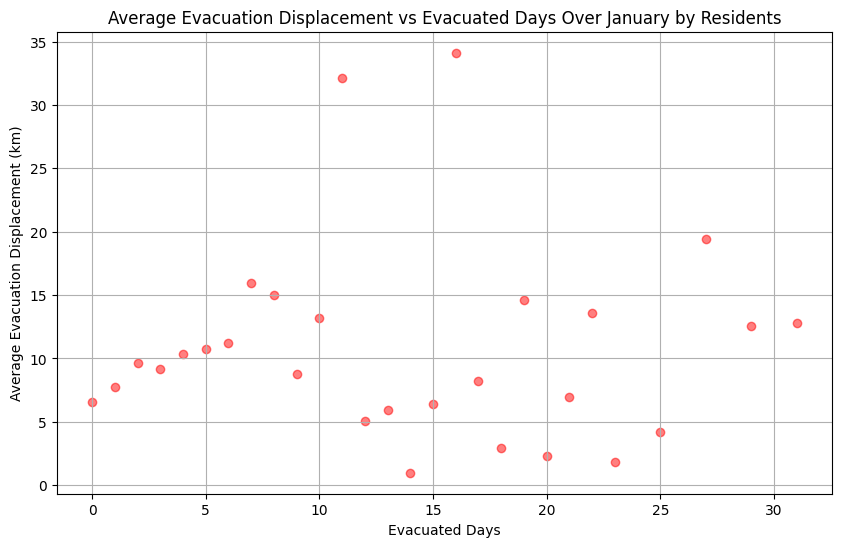

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming residents_df is already defined and populated

# Group by 'evacuated_days' and calculate the mean 'displacement'
grouped_df = residents_df.groupby('evacuated_days')['displacement'].mean().reset_index()

# Plot the results as a red scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['evacuated_days'], grouped_df['displacement'], color='red', alpha=0.5)
plt.title('Average Evacuation Displacement vs Evacuated Days Over January by Residents')
plt.xlabel('Evacuated Days')
plt.ylabel('Average Evacuation Displacement (km)')
plt.grid(True)
# Save the plot to a file (e.g., PNG format)
plt.savefig('E:\\IRP_noto_earthquake\\results\\wajima_evacuation_displacement.png')

plt.show()




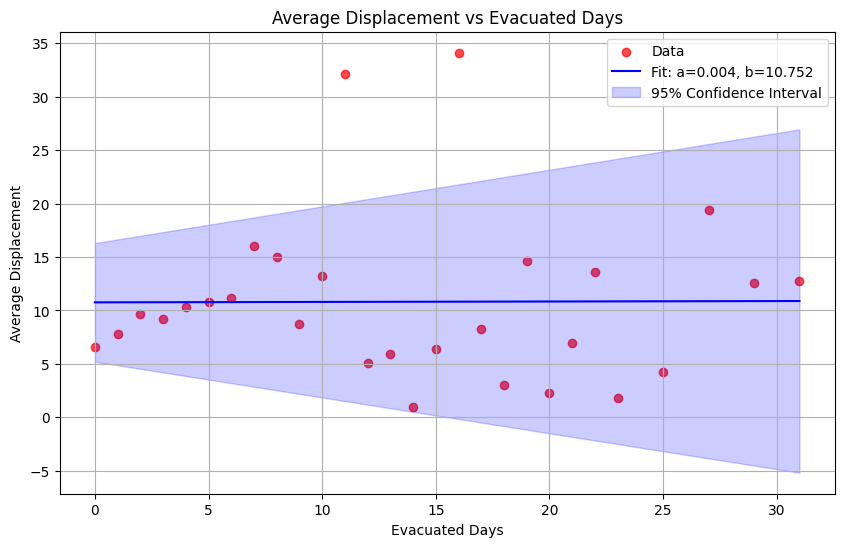

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming residents_df is already defined and populated
# Assuming evacuated_df is meant to be residents_df based on previous context

# Group by 'evacuated_days' and calculate the mean 'displacement'
grouped_df = residents_df.groupby('evacuated_days')['displacement'].mean().reset_index()

# Define a linear function
def linear_func(x, a, b):
    return a * x + b

# Fit the linear function to the data
popt, pcov = curve_fit(linear_func, grouped_df['evacuated_days'], grouped_df['displacement'])

# Extract the optimal parameters and their covariance
a, b = popt
perr = np.sqrt(np.diag(pcov))  # Standard deviation errors on the parameters

# Define the linear fit line
fit_line = linear_func(grouped_df['evacuated_days'], *popt)

# Calculate confidence intervals
alpha = 0.05  # 95% confidence interval
n = len(grouped_df['evacuated_days'])  # Number of data points
t_val = 1.96  # T-value for 95% confidence interval (approximately for large n)

# Prediction standard deviation of the fit
y_err = perr[0] * grouped_df['evacuated_days'] + perr[1]
confidence_interval = t_val * y_err

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['evacuated_days'], grouped_df['displacement'], color='red', alpha=0.7, label='Data')
plt.plot(grouped_df['evacuated_days'], fit_line, color='blue', label='Fit: a=%5.3f, b=%5.3f' % tuple(popt))

# Plot the confidence intervals
plt.fill_between(grouped_df['evacuated_days'], fit_line - confidence_interval, fit_line + confidence_interval, color='blue', alpha=0.2, label='95% Confidence Interval')

plt.title('Average Displacement vs Evacuated Days')
plt.xlabel('Evacuated Days')
plt.ylabel('Average Displacement')
plt.grid(True)
plt.legend()
plt.show()


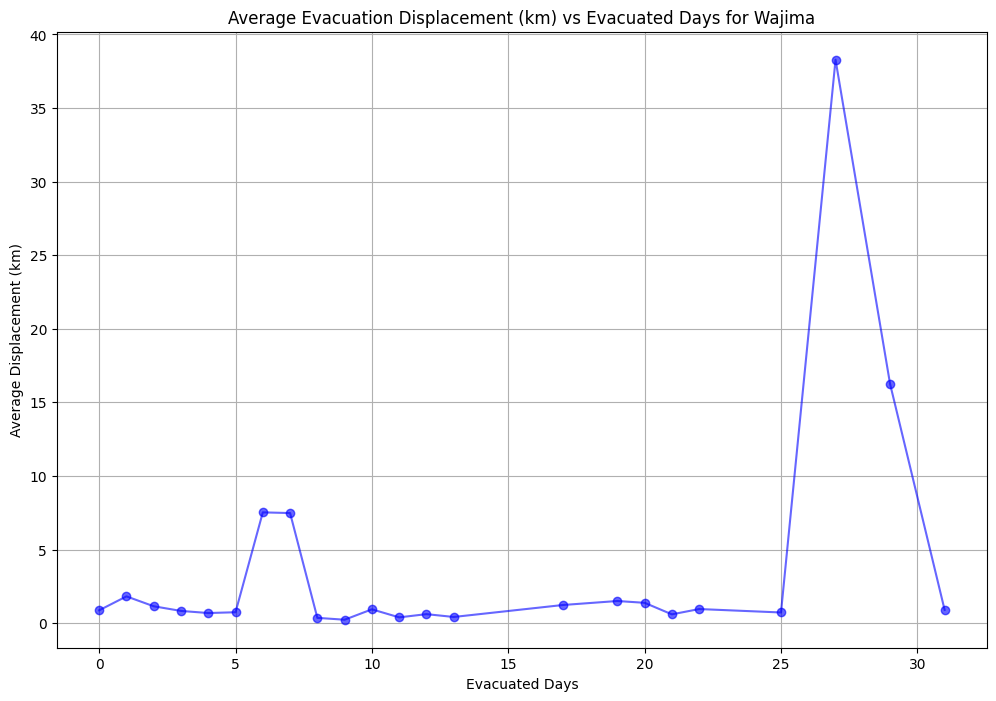

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming residents_df is already defined and populated

# Filter the data for Wajima
wajima_df = residents_df[residents_df['home_city'] == 'Wajima City']

# Group by 'evacuated_days' and calculate the mean 'displacement' for Wajima
grouped_wajima_df = wajima_df.groupby('evacuated_days')['displacement'].median().reset_index()

# Plot the results for Wajima
plt.figure(figsize=(12, 8))
plt.plot(grouped_wajima_df['evacuated_days'], grouped_wajima_df['displacement'], color='blue', alpha=0.6, marker='o')

plt.title('Average Evacuation Displacement (km) vs Evacuated Days for Wajima')
plt.xlabel('Evacuated Days')
plt.ylabel('Average Displacement (km)')
plt.grid(True)
plt.show()


In [97]:
#

display(residents_df.head())

,common_id,evacuated_on,returned_on,evacuated_days,displacement,home_city
0,001de71e-04b1-447a-a637-e045aee10c23,2024-01-01 18:12:43,2024-01-02 16:30:55,0.0,1.249963,Nanao City
1,0074cea7e45281ddc54de84b92756143,2024-01-02 07:32:13,NaN,31.0,0.051031,Wajima City
2,00a0a8847001f885782f7e55b57861ad,2024-01-02 07:41:54,2024-01-04 09:42:43,2.0,0.572605,Shika-machi
3,00a7eb7b743c5e4bcce8b28721c6bf48,2024-01-02 20:26:43,2024-01-04 09:59:44,1.0,7.696617,Nanao City
4,01115f3a53ec4b347b8e65b6ac070563,2024-01-01 09:26:28,2024-01-04 20:53:45,3.0,2.387377,Nanao City


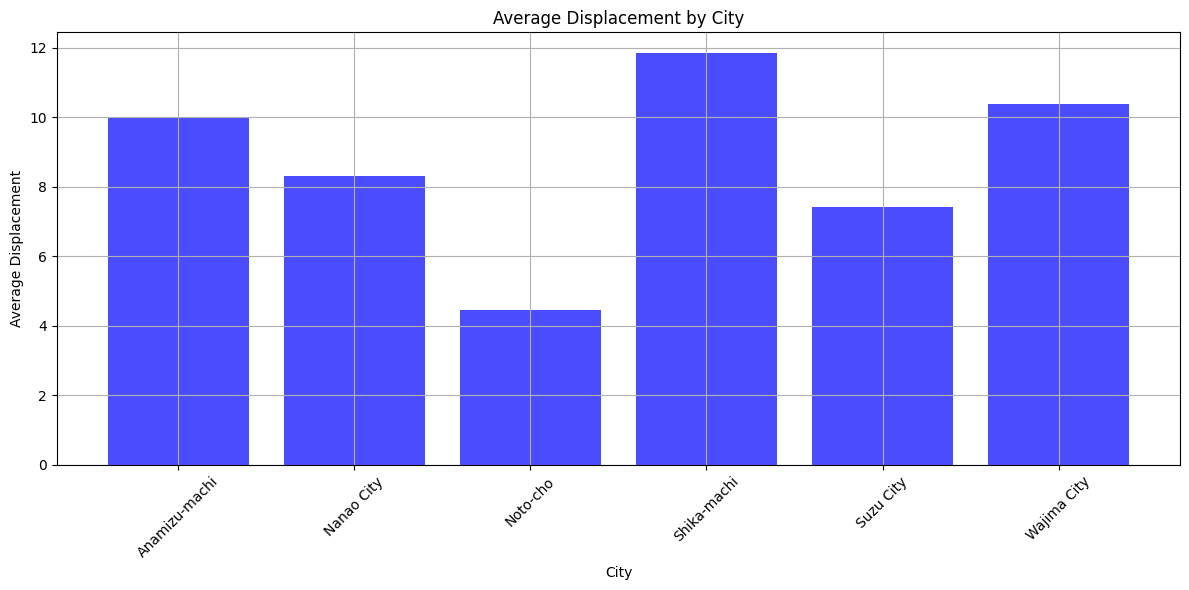

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named `residents_df`
# Assuming the dataset is already loaded and has the necessary columns

# Compute average displacement by city
avg_displacement_by_city = residents_df.groupby('home_city')['displacement'].mean().reset_index()

# Plot average displacement by city
plt.figure(figsize=(12, 6))
plt.bar(avg_displacement_by_city['home_city'], avg_displacement_by_city['displacement'], color='blue', alpha=0.7)
plt.title('Average Displacement by City')
plt.xlabel('City')
plt.ylabel('Average Displacement')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


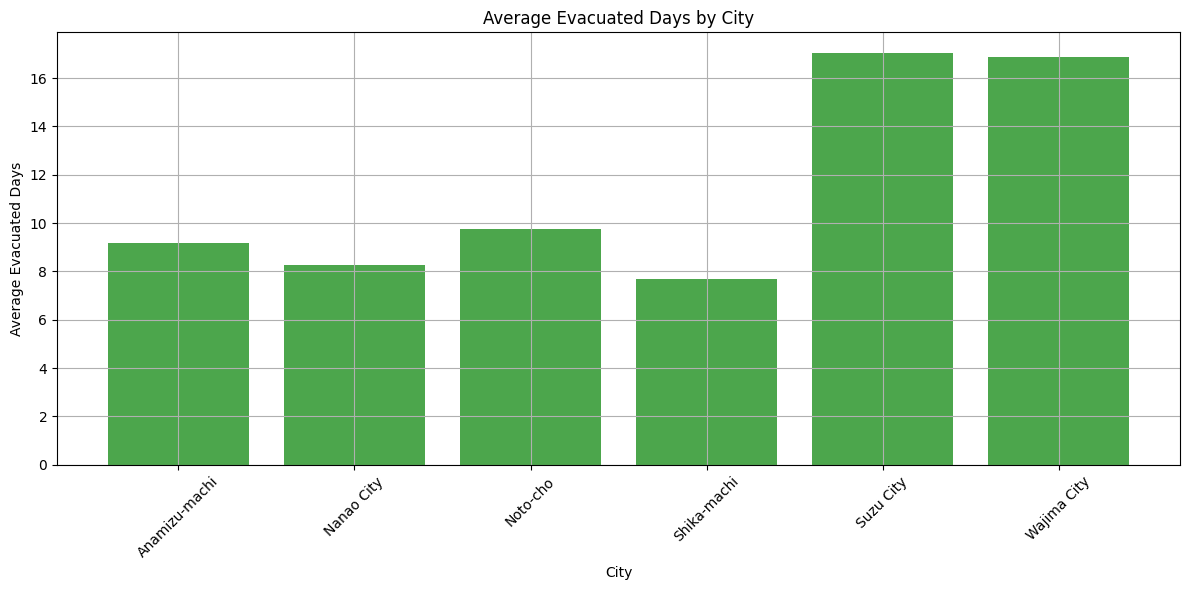

In [99]:
# Compute average evacuated days by city
avg_evacuated_days_by_city = residents_df.groupby('home_city')['evacuated_days'].mean().reset_index()

# Plot average evacuated days by city
plt.figure(figsize=(12, 6))
plt.bar(avg_evacuated_days_by_city['home_city'], avg_evacuated_days_by_city['evacuated_days'], color='green', alpha=0.7)
plt.title('Average Evacuated Days by City')
plt.xlabel('City')
plt.ylabel('Average Evacuated Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


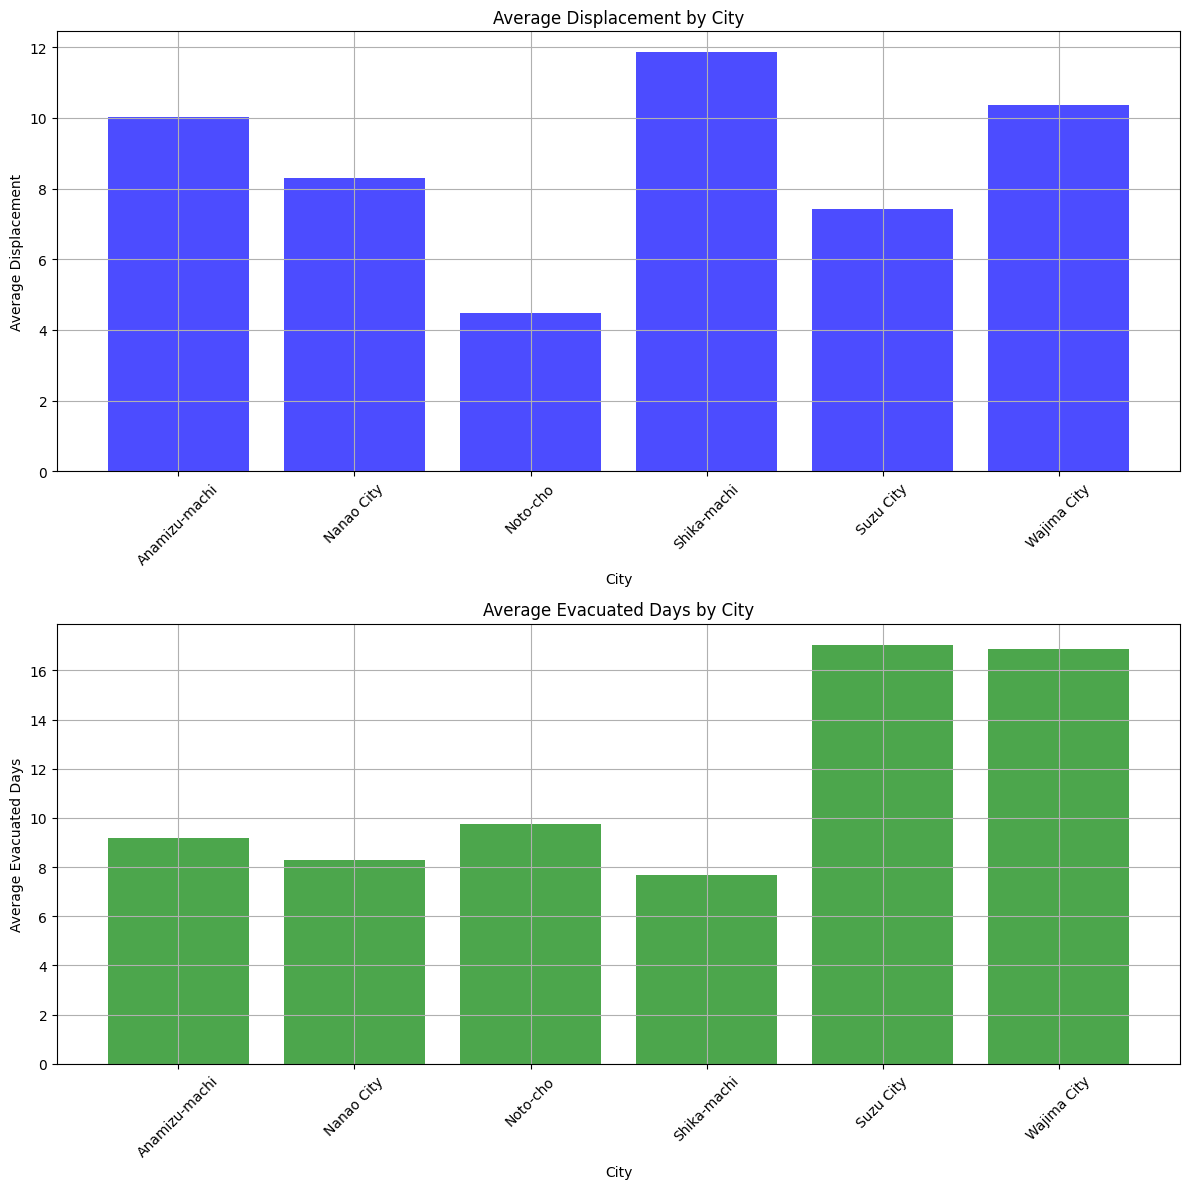

In [100]:
# Create subplots for both plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot average displacement by city
ax1.bar(avg_displacement_by_city['home_city'], avg_displacement_by_city['displacement'], color='blue', alpha=0.7)
ax1.set_title('Average Displacement by City')
ax1.set_xlabel('City')
ax1.set_ylabel('Average Displacement')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot average evacuated days by city
ax2.bar(avg_evacuated_days_by_city['home_city'], avg_evacuated_days_by_city['evacuated_days'], color='green', alpha=0.7)
ax2.set_title('Average Evacuated Days by City')
ax2.set_xlabel('City')
ax2.set_ylabel('Average Evacuated Days')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
